In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Random Forest/diabetes.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe(include='all')##get summary all column when column has mixed column types

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

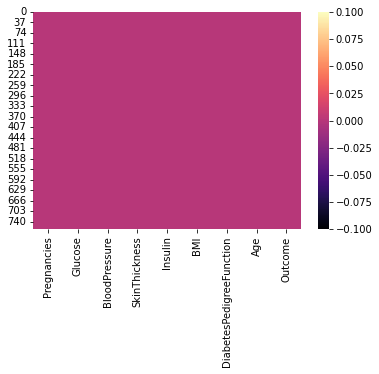

In [ ]:
sns.heatmap(data.isnull(),cbar = True,cmap = 'magma')  ## Checking null Values
data.isnull().sum()

In [ ]:
error = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction'] ## doubt that null values have been replaced with 0.
data[error].isin([0]).sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64

In [ ]:
data[error] = data[error].replace(0, np.NaN)   ##doubt right.replace 0's with NaN value,we can impute it later and will check main data is updated with null values or not.
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer ##Impute our null values and fill it with mean
si = SimpleImputer(missing_values = np.NaN, strategy="mean")
data[error] = si.fit_transform(data[error])

In [ ]:
data.isnull().sum() ## Checking null values fixed or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64

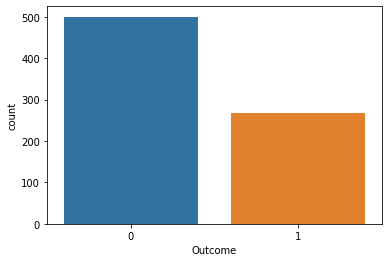

In [ ]:
sns.countplot(x = data['Outcome']) ## check whether data is balanced(1) or imbalenced(0)
data['Outcome'].value_counts()

In [ ]:
# using upsampling technique       ##Imablance affirmed,fixing it.
from sklearn.utils import resample
data_major = data[(data['Outcome']==0)]
data_minor = data[(data['Outcome']==1)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = 500,
                    random_state= 42)
df = pd.concat([upsample, data_major]) #Concate object like df series

1    500
0    500
Name: Outcome, dtype: int64

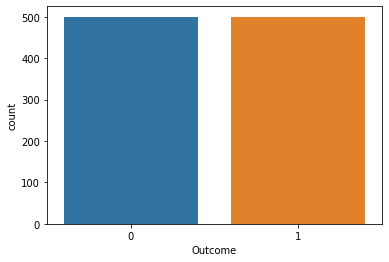

In [ ]:
sns.countplot(x = df['Outcome'])
df['Outcome'].value_counts()

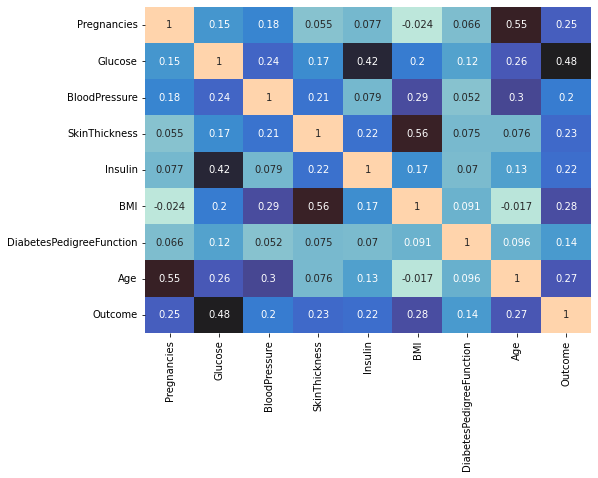

In [ ]:
plt.figure(figsize = (8,6))  ##  Check Co-relation
corr = df.corr()
sns.heatmap(corr,annot = True,cbar = False, cmap = 'icefire')

In [ ]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       147
           1       0.83      0.94      0.88       153

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

[[118  29]
 [  9 144]]


Accuracy Score =  0.87


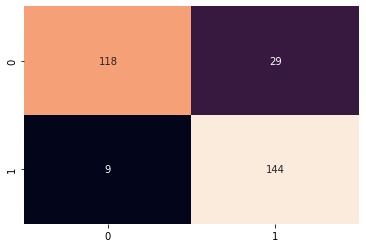

In [ ]:
cm = confusion_matrix(y_test,pred_rf) ##A much better way to evaluate the performance of a classifier is to look at the confusion matrix.

sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,pred_rf),2))